# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
import pandas as pd

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Create the 'FaixaLat' column based on latitude
sinasc_raw['FaixaLat'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Apply groupby() using the latitude ranges as the key
grouped = sinasc_raw.groupby('FaixaLat')

# Select two numeric variables for analysis
variavel1 = 'PESO'
variavel2 = 'IDADEMAE'

# Perform statistical operations on the selected variables
resultado = grouped[[variavel1, variavel2]].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

print("Resultados das Operações Estatísticas:")
print(resultado)


Resultados das Operações Estatísticas:
                     PESO                                               
                      sum         mean  min   max  median         std   
FaixaLat                                                                
Abaixo de -10.5  42098594  3240.098053  258  5985  3270.0  531.815114  \
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                               IDADEMAE                                       
                           var      sum       mean min max median       std   
FaixaLat                                                                      
Abaixo de -10.5  282827.315354   340143  26.178943  12  53   26.0  6.320385  \
Acima de -10.5   309678.570242   365094  26.014964  11  52   25.0  6.447663   

                            
                       var  
FaixaLat                    
Abaixo de -10.5  39.947272  
Acima de -10.5   41.572355  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
import pandas as pd

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Create the 'FaixaArea' column based on the area
sinasc_raw['FaixaArea'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

# Apply groupby() using the area ranges as the key
grouped = sinasc_raw.groupby('FaixaArea')

# Select two numeric variables for analysis
variavel1 = 'PESO'
variavel2 = 'IDADEPAI'

# Perform statistical operations on the selected variables
resultado = grouped[[variavel1, variavel2]].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

print("Resultados das Operações Estatísticas:")
print(resultado)


Resultados das Operações Estatísticas:
                    PESO                                               
                     sum         mean  min   max  median         std   
FaixaArea                                                              
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103  \
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                               IDADEPAI                                 
                          var       sum       mean   min   max median   
FaixaArea                                                               
Abaixo de 3000  282580.595074   78074.0  31.092792  16.0  69.0   30.0  \
Acima de 3000   299993.453720  158424.0  31.094014  15.0  86.0   30.0   

                                     
                     std        var  
FaixaArea                            
Abaixo de 3000  7.675474  58.912900  
Acima de 3000   7.818364  61.126809  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
import pandas as pd

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Create the 'FaixaAlt' column based on the altitude
sinasc_raw['FaixaAlt'] = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), 500, 1000, float('inf')], labels=['Baixa', 'Média', 'Alta'])

# Apply groupby() using the altitude ranges as the key
grouped = sinasc_raw.groupby('FaixaAlt')

# Select two numeric variables for analysis
variavel1 = 'PESO'
variavel2 = 'IDADEMAE'

# Perform statistical operations on the selected variables
resultado = grouped[[variavel1, variavel2]].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

print("Resultados das Operações Estatísticas:")
print(resultado)


Resultados das Operações Estatísticas:
              PESO                                                   
               sum         mean    min     max  median         std   
FaixaAlt                                                             
Baixa     82517644  3244.000629  258.0  5985.0  3270.0  544.151570  \
Média      5136098  3230.250314  425.0  4920.0  3272.0  554.485749   
Alta             0          NaN    NaN     NaN     NaN         NaN   

                        IDADEMAE                                           
                    var      sum       mean   min   max median       std   
FaixaAlt                                                                   
Baixa     296100.931121   663207  26.072532  11.0  53.0   25.0  6.391458  \
Média     307454.445799    42030  26.433962  14.0  46.0   26.0  6.310937   
Alta                NaN        0        NaN   NaN   NaN    NaN       NaN   

                     
                var  
FaixaAlt             
Baixa     40.8507

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [46]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))


Text(0.5, 0, 'Mês')

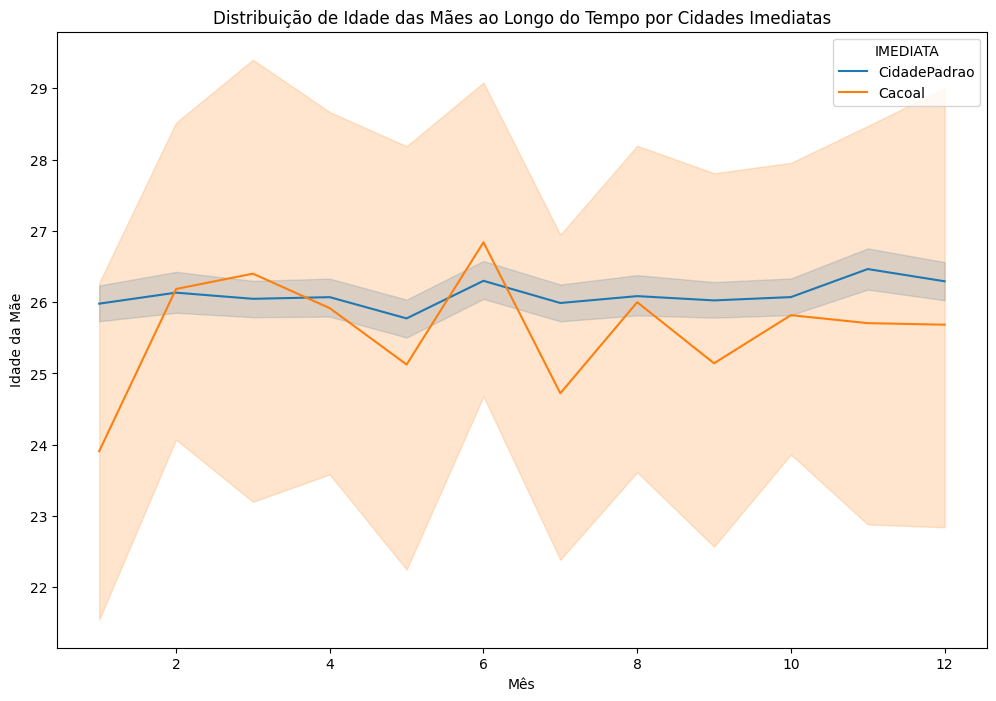

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
sinasc_2 = sinasc_raw.copy()[['munResNome', 'IDADEMAE', 'IDADEPAI', 'DTNASC']]

sinasc_2['DTNASC'] =  pd.to_datetime(sinasc_2['DTNASC'])

sinasc_2['MES'] = sinasc_2['DTNASC'].dt.month



imediatas = {

    "Alto Alegre dos Parecis": "Cacoal",

    "Novo Horizonte do Oeste": "Cacoal", 

    "Município ignorado - RO": np.nan

}


sinasc_2['IMEDIATA'] = sinasc_2['munResNome'].apply(lambda x: imediatas.get(x, 'CidadePadrao'))


sinasc_2.groupby('IMEDIATA')[['IDADEMAE', 'IDADEPAI']].agg('mean')


fig = plt.figure(figsize=(12,8))

fig = sns.lineplot(data=sinasc_2, x = 'MES', y = 'IDADEMAE', hue = 'IMEDIATA')

fig.set_title('Distribuição de Idade das Mães ao Longo do Tempo por Cidades Imediatas')

fig.set_ylabel('Idade da Mãe')

fig.set_xlabel('Mês')



### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [68]:
import pandas as pd

dados_csv = pd.read_csv('dados_extras_ro.csv', delimiter=';', encoding='latin-1')
dados_municipios = pd.DataFrame(dados_csv, columns=['municipio', 'idh'])

# Definindo os limites das faixas (bins) para o IDHM
bins = [0.0, 0.6, 0.7, 0.8, 1.0]  # Aqui, estou dividindo os municípios em 4 faixas

# Criando as labels para as faixas
labels = ['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto']

# Criando uma nova coluna 'Faixa_IDHM' no DataFrame com base nas faixas definidas
dados_municipios['Faixa_IDHM'] = pd.cut(dados_municipios['idh'], bins=bins, labels=labels, include_lowest=True)

print(dados_municipios)

                    municipio    idh   Faixa_IDHM
0       Alta Floresta D'Oeste  0.641  Médio-Baixo
1     Alto Alegre dos Parecis  0.592        Baixo
2                Alto Paraíso  0.625  Médio-Baixo
3            Alvorada D'Oeste  0.643  Médio-Baixo
4                   Ariquemes  0.702   Médio-Alto
5                     Buritis  0.616  Médio-Baixo
6                      Cabixi  0.650  Médio-Baixo
7                 Cacaulândia  0.646  Médio-Baixo
8                      Cacoal  0.718   Médio-Alto
9      Campo Novo de Rondônia  0.593        Baixo
10         Candeias do Jamari  0.649  Médio-Baixo
11               Castanheiras  0.658  Médio-Baixo
12                 Cerejeiras  0.692  Médio-Baixo
13                Chupinguaia  0.652  Médio-Baixo
14          Colorado do Oeste  0.685  Médio-Baixo
15                 Corumbiara  0.613  Médio-Baixo
16              Costa Marques  0.611  Médio-Baixo
17                    Cujubim  0.612  Médio-Baixo
18            Espigão D'Oeste  0.672  Médio-Baixo


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [61]:
import pandas as pd

dados_csv = pd.read_csv('dados_extras_ro.csv', delimiter=';', encoding='latin-1')
dados_municipios = pd.DataFrame(dados_csv, columns=['municipio', 'ifdm'])

faixas_mapping = {
    (0.0, 0.4): 'Baixo',
    (0.4, 0.6): 'Médio',
    (0.6, 0.8): 'Alto',
    (0.7, 0.8): 'Muito Alto',
}
bins = [0.0, 0.4, 0.6, 0.7, 0.8]

labels = ['Desenvolvimento Baixo', 'Desenvolvimento Médio', 'Desenvolvimento Alto','Desenvolvimento Muito Alto']

# Obtendo apenas os limites inferiores dos bins
bins = [bin[0] for bin in faixas_mapping.keys()]
# Adicionando o limite superior final
bins.append(0.8)

# Criando uma nova coluna 'Faixa_IFDM' no DataFrame com base nas faixas definidas
dados_municipios['Faixa_IFDM'] = pd.cut(dados_municipios['ifdm'], bins=bins, labels=labels, include_lowest=True)

print(dados_municipios)

                    municipio    ifdm                  Faixa_IFDM
0       Alta Floresta D'Oeste  0.6337        Desenvolvimento Alto
1     Alto Alegre dos Parecis  0.5046       Desenvolvimento Médio
2                Alto Paraíso  0.5735       Desenvolvimento Médio
3            Alvorada D'Oeste  0.5919       Desenvolvimento Médio
4                   Ariquemes  0.7746  Desenvolvimento Muito Alto
5                     Buritis  0.6199        Desenvolvimento Alto
6                      Cabixi  0.5887       Desenvolvimento Médio
7                 Cacaulândia  0.5721       Desenvolvimento Médio
8                      Cacoal  0.7111  Desenvolvimento Muito Alto
9      Campo Novo de Rondônia  0.5272       Desenvolvimento Médio
10         Candeias do Jamari  0.6199        Desenvolvimento Alto
11               Castanheiras  0.5430       Desenvolvimento Médio
12                 Cerejeiras  0.6137        Desenvolvimento Alto
13                Chupinguaia  0.6766        Desenvolvimento Alto
14        

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [67]:
import pandas as pd

dados_csv = pd.read_csv('dados_extras_ro.csv', delimiter=';', encoding='latin-1')
dados_municipios = pd.DataFrame(dados_csv, columns=['municipio', 'pib'])


# Definindo os limites das faixas (bins) para o PIB
bins = [0.0, 300000, 500000, 1000000, float('inf')]  # Definimos os limites das faixas

# Criando as labels para as faixas
labels = ['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto']

# Criando uma nova coluna 'Faixa_PIB' no DataFrame com base nas faixas definidas
dados_municipios['Faixa_pib'] = pd.cut(dados_municipios['pib'], bins=bins, labels=labels, include_lowest=True)

print(dados_municipios)


                    municipio       pib    Faixa_pib
0       Alta Floresta D'Oeste    496000  Médio-Baixo
1     Alto Alegre dos Parecis    213410        Baixo
2                Alto Paraíso    358000  Médio-Baixo
3            Alvorada D'Oeste    204098        Baixo
4                   Ariquemes   2579830         Alto
5                     Buritis    726000   Médio-Alto
6                      Cabixi    113031        Baixo
7                 Cacaulândia    116635        Baixo
8                      Cacoal   2261644         Alto
9      Campo Novo de Rondônia    208821        Baixo
10         Candeias do Jamari    548000   Médio-Alto
11               Castanheiras     59779        Baixo
12                 Cerejeiras    507000   Médio-Alto
13                Chupinguaia    190331        Baixo
14          Colorado do Oeste    335000  Médio-Baixo
15                 Corumbiara    188218        Baixo
16              Costa Marques    171878        Baixo
17                    Cujubim    385000  Médio

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

In [69]:


import pandas as pd

dados_csv = pd.read_csv('dados_extras_ro.csv', delimiter=';', encoding='latin-1')
dados_municipios = pd.DataFrame(dados_csv, columns=['municipio', 'pib', 'ifdm','idh'])


# Agrupando os dados por município e calculando a média das colunas 'PIB', 'IFDM' e 'IDH'
media_por_municipio = dados_municipios.groupby('municipio')[['pib', 'ifdm', 'idh']].mean()

print(media_por_municipio)



                                  pib    ifdm    idh
municipio                                           
Alta Floresta D'Oeste        496000.0  0.6337  0.641
Alto Alegre dos Parecis      213410.0  0.5046  0.592
Alto Paraíso                 358000.0  0.5735  0.625
Alvorada D'Oeste             204098.0  0.5919  0.643
Ariquemes                   2579830.0  0.7746  0.702
Buritis                      726000.0  0.6199  0.616
Cabixi                       113031.0  0.5887  0.650
Cacaulândia                  116635.0  0.5721  0.646
Cacoal                      2261644.0  0.7111  0.718
Campo Novo de Rondônia       208821.0  0.5272  0.593
Candeias do Jamari           548000.0  0.6199  0.649
Castanheiras                  59779.0  0.5430  0.658
Cerejeiras                   507000.0  0.6137  0.692
Chupinguaia                  190331.0  0.6766  0.652
Colorado do Oeste            335000.0  0.6473  0.685
Corumbiara                   188218.0  0.5759  0.613
Costa Marques                171878.0  0.5626 

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
Aqui vemos que Porto velho se destaca com os maiores numeros em desenvolvimento pib e idh sua evolução é notoria. 